In [22]:
# [原博地址](https://sam-koblenski.blogspot.com/2018/08/building-model-for-retirement-savings.html)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
rate = 1.07
years_saving = 48
initial_savings = 12000
model = pd.DataFrame({'t': range(years_saving)})
model['simple_exp'] = [initial_savings*rate**year for year in model.t]

Text(0,0.5,'value ($)')

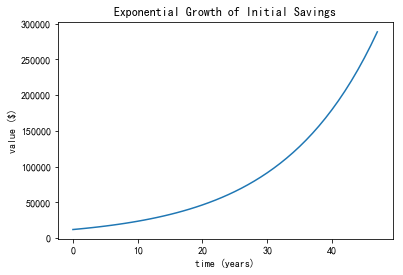

In [3]:
plt.figure()
plt.plot(model.t, model.simple_exp)
plt.title('Exponential Growth of Initial Savings')
plt.xlabel('time (years)')
plt.ylabel('value ($)')

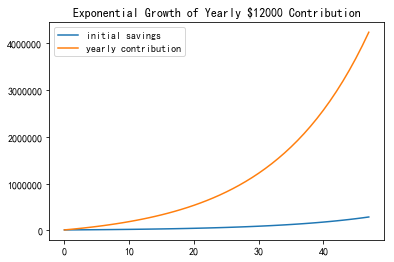

In [10]:
yearly_contribution = 12000
model['yearly_invest'] = model['simple_exp'] + [yearly_contribution*(rate**year - 1)/(rate-1) for year in model.t]
plt.plot(model.t, model.simple_exp, model.yearly_invest)
plt.title('Exponential Growth of Yearly $' + str(yearly_contribution) + ' Contribution')
plt.legend(['initial savings', 'yearly contribution'])

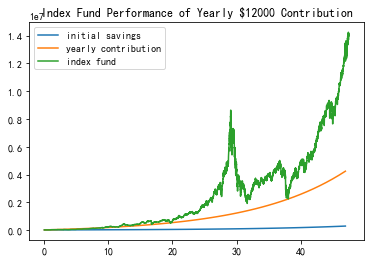

In [19]:
ixic = pd.read_csv('ixic.csv')
ixic['Date'] = pd.to_datetime(ixic['Date'])
ixic['t'] = (ixic.Date - ixic.Date.min()) / np.timedelta64(1, 'Y')

shares = initial_savings / ixic.Close.iloc[0]
share_col = pd.Series(index=ixic.index)
for index, row in ixic.iterrows():
    if row.t >= round(row.t) and ixic.t.iloc[index-1] < round(row.t):
        shares += yearly_contribution / row.Close
    share_col.iloc[index] = shares
ixic['shares'] = share_col
plt.plot(model.t, model.simple_exp, model.yearly_invest)
plt.plot(ixic.t, ixic.Close*ixic.shares)
plt.title('Index Fund Performance of Yearly $' + str(yearly_contribution) + ' Contribution')
plt.legend(['initial savings', 'yearly contribution', 'index fund'])

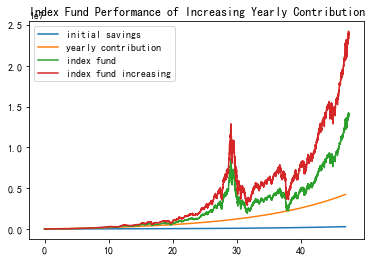

In [20]:
shares = initial_savings / ixic.Close.iloc[0]
share_col = pd.Series(index=ixic.index)
for index, row in ixic.iterrows():
    if row.t >= round(row.t) and ixic.t.iloc[index-1] < round(row.t):
        shares += yearly_contribution / row.Close
        yearly_contribution *= 1.05
    share_col.iloc[index] = shares
ixic['shares_inc'] = share_col
plt.plot(model.t, model.simple_exp, model.yearly_invest)
plt.plot(ixic.t, ixic.Close*ixic.shares)
plt.plot(ixic.t, ixic.Close*ixic.shares_inc)
plt.title('Index Fund Performance of Increasing Yearly Contribution')
plt.legend(['initial savings', 'yearly contribution', 'index fund', 'index fund increasing'])

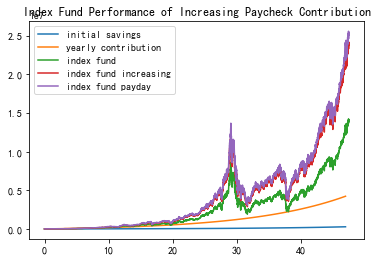

In [21]:
payday_contribution = 500
shares = initial_savings / ixic.Close.iloc[0]
share_col = pd.Series(index=ixic.index)
prev_day = ixic.Date.iloc[0].day
for index, row in ixic.iterrows():
    today = ixic.Date.iloc[index-1].day
    if prev_day > 15 and today < 10 or prev_day < 15 and today >= 15:
        shares += payday_contribution / row.Close
    if row.t >= round(row.t) and ixic.t.iloc[index-1] < round(row.t):
        payday_contribution *= 1.05
    share_col.iloc[index] = shares
    prev_day = today
ixic['shares_inc_payday'] = share_col
plt.plot(model.t, model.simple_exp, model.yearly_invest)
plt.plot(ixic.t, ixic.Close*ixic.shares)
plt.plot(ixic.t, ixic.Close*ixic.shares_inc)
plt.plot(ixic.t, ixic.Close*ixic.shares_inc_payday)
plt.title('Index Fund Performance of Increasing Paycheck Contribution')
plt.legend(['initial savings', 'yearly contribution', 'index fund', 'index fund increasing', 'index fund payday'])